In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv("Titanic.csv")

In [4]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
ds.shape

(891, 12)

<AxesSubplot:>

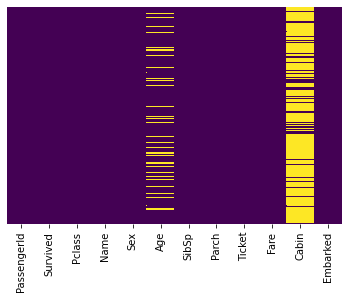

In [11]:
#Exploratory data analysis
#Missing data
sns.heatmap(ds.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [17]:
#It is observed max number of null values are present in age & cabin column.

<AxesSubplot:xlabel='Survived', ylabel='count'>

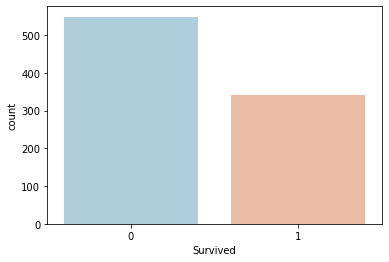

In [20]:
sns.countplot(x='Survived',data=ds, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

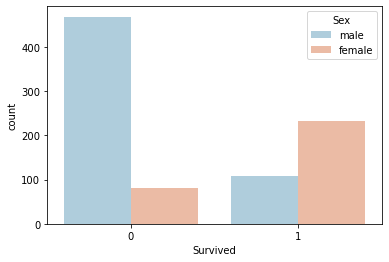

In [22]:
#checking sex of the survived.
sns.countplot(x='Survived',hue='Sex', data=ds, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

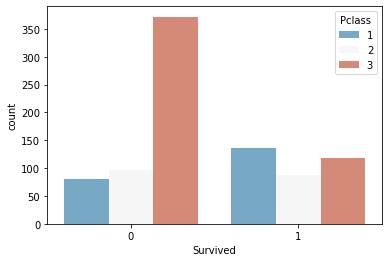

In [23]:
#Code to check Pclass of the survived.
sns.countplot(x='Survived', hue='Pclass',data=ds, palette="RdBu_r")

C:\Users\fambareen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

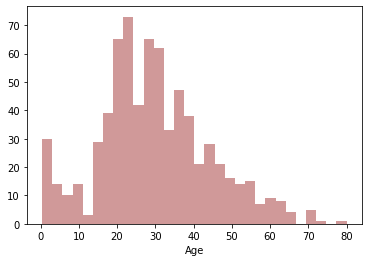

In [25]:
#Checking distribution of the age
sns.distplot(ds['Age'].dropna(), kde=False, color='darkred',bins=30)

In [26]:
#The age is distributed normally. Normal distribution.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

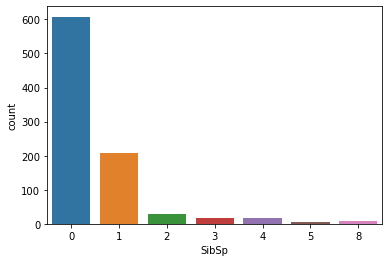

In [28]:
sns.countplot(x='SibSp',data=ds)

<AxesSubplot:>

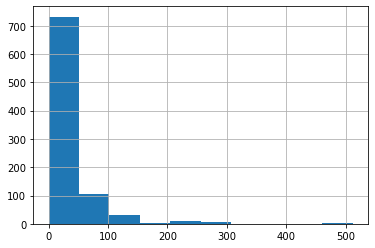

In [29]:
ds['Fare'].hist()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

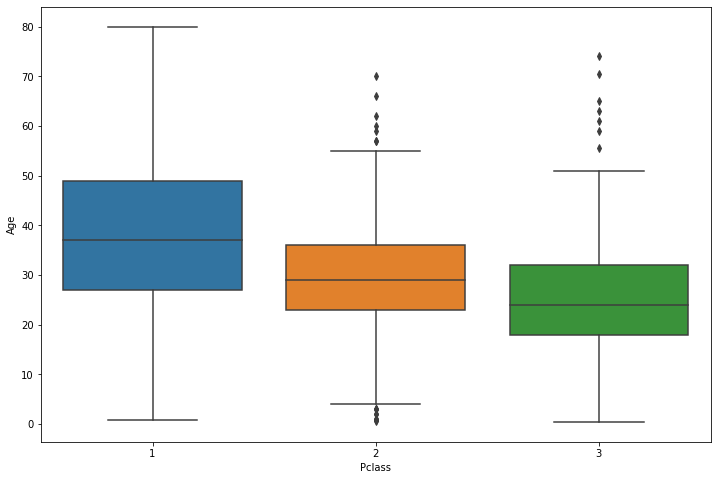

In [35]:
#Data Cleaning
#Age missing data is filled using mean age. The passengeraverage age by passenger class is taken.
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=ds)


In [61]:
#It was observed the passenger with higher class is older. The average age values are imputed based on Pclas for age.
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        else:
            return 24
    
    else:
            return Age

In [62]:
#Apply the function. Replacing values.
ds['Age']=ds[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

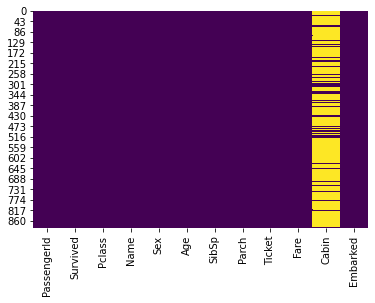

In [66]:
#Checking heatmap to see if age is replaced 
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')

In [67]:
#Dropping the cabin column
ds.drop('Cabin',axis=1, inplace=True)

In [68]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [69]:
pd.get_dummies(ds['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [72]:
Sex=pd.get_dummies(ds['Sex'],drop_first=True)
Embarked=pd.get_dummies(ds['Embarked'],drop_first=True)

In [73]:
ds.drop(['Name','Ticket','Sex','Embarked'], axis=1, inplace=True)

In [74]:
ds.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [76]:
ds= pd.concat([ds,Sex,Embarked],axis=1)

In [77]:
ds.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [78]:
#Now Ds is ready#Applying Logistics Regression model
ds.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [79]:
ds['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(ds.drop('Survived',axis=1),ds['Survived'],test_size=0.3, random_state=101)

In [84]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression

In [85]:
lgmdl =LogisticRegression()
lgmdl.fit(X_train, y_train)

C:\Users\fambareen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
pred=lgmdl.predict(X_test)

In [87]:
#Checking accuracy using confusion matrix
from sklearn.metrics import accuracy_score

In [88]:
accuracy=accuracy_score(y_test, pred)

In [89]:
accuracy

0.7686567164179104

In [91]:
#Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

